In [4]:
from IPython.display import Image, display

1. Every time you interact with the internet, you're using HTTP (HyperText Transfer Protocol) or its secure counterpart, HTTPS.

2. These protocols are the **fundamental language spoken between clients and servers**, defining how information is requested and delivered.

In this chapter, we'll delve into their core principles, key differences, and crucial evolution from HTTP/1.1 to HTTP/3.


## 1. What is HTTP?

1. HTTP (HyperText Transfer Protocol) is a **stateless, text-based application-layer protocol** used for communication between web clients and servers. 

2. It's the standard for transmitting web pages and data over the internet.


**Key Characteristics:**

1. **Application Layer Protocol**: HTTP operates at Layer 7 of the OSI model.

2. **Client-Server Model**: Communication is always initiated by a client (e.g., your browser, a mobile app, a microservice) sending a request to a server. The server then processes the request and sends a response back to the client.

3. **Built on TCP**: HTTP traditionally sits on top of TCP (Transmission Control Protocol) at the Transport Layer, leveraging TCP's reliable, ordered, and connection-oriented delivery. 

**By default, HTTP uses port 80.**



Example HTTP Request and Response

Request:

    GET /index.html HTTP/1.1
    Host: example.com
    User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36  Chrome/100.0.4896.75
    Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8
    Accept-Language: en-US,en;q=0.5
    Connection: keep-alive

Response:

    HTTP/1.1 200 OK
    Content-Type: text/html; charset=UTF-8
    Content-Length: 1024
    Date: Mon, 11 Apr 2023 10:00:00 GMT

    <!DOCTYPE html>
    <html>
    <head><title>Example Domain</title></head>
    <body><h1>Hello World!</h1></body>
    </html>

    


## 2. How HTTP Works


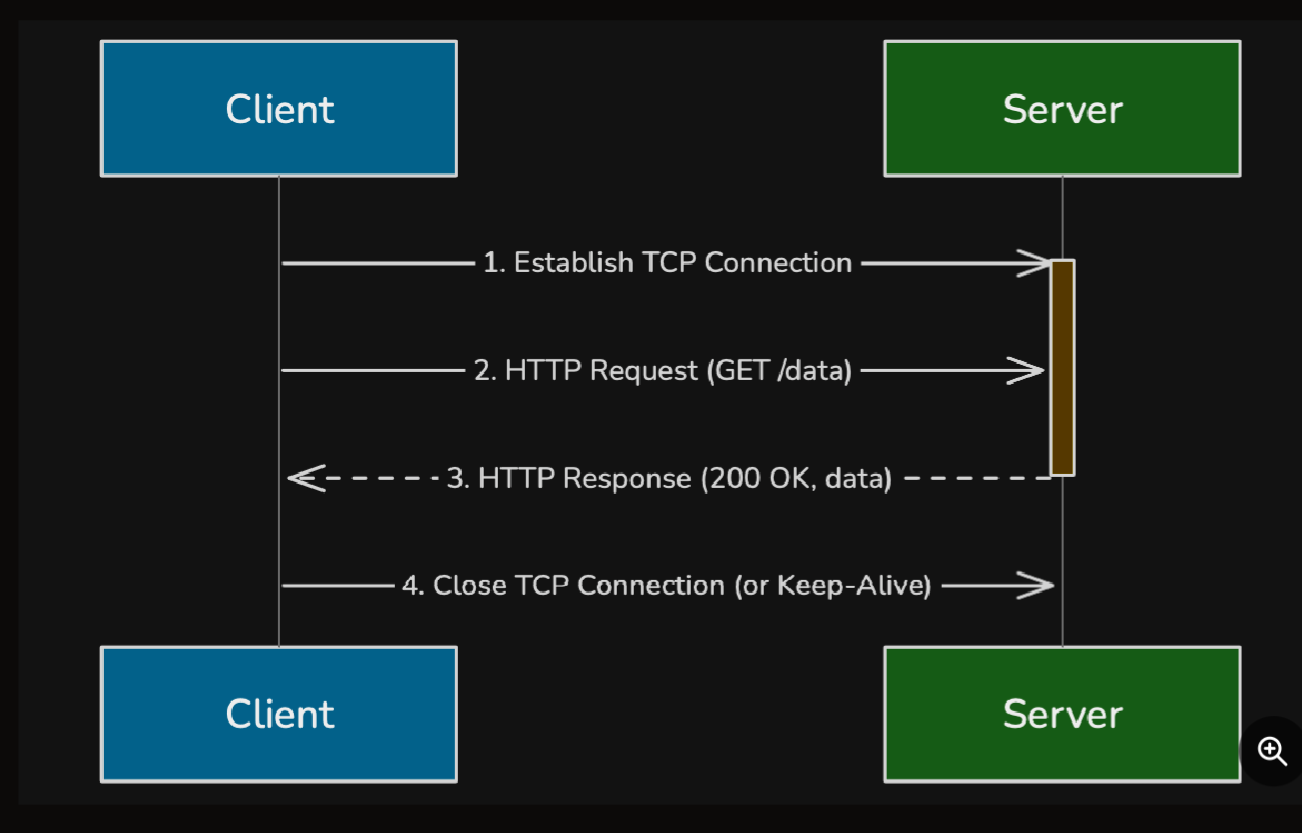

In [5]:
display(Image(filename='Utils/2.png'))

At its core, HTTP operates on a simple request/response model:

1. TCP Connection: The client first establishes a TCP connection with the server (or reuses an existing one).

2. HTTP Request: The client sends an HTTP request message. This message includes:
    
    1. An HTTP Method (e.g., GET, POST).
    
    2. The URL of the resource.
    
    3. HTTP Headers (key-value pairs providing additional context, e.g., Host, User-Agent).
    Optionally, a message body (e.g., for POST requests).


3. Server Processing: The server receives the request, processes it (e.g., fetches data from a database, runs business logic).

4. HTTP Response: The server sends an HTTP response message back to the client. This includes:

    An HTTP Status Code (e.g., 200 OK, 404 Not Found).
    Response Headers (e.g., Content-Type, Content-Length).
    The message body (e.g., the requested HTML content, JSON data).

5. Connection Closure/Reuse: The TCP connection is either closed after the response (HTTP/1.0, though uncommon now) or kept open for subsequent requests (HTTP Keep-Alive in HTTP/1.1+).
Statelessness:



**Statelessness:**

**HTTP is inherently stateless. This means each request from a client to a server is treated as an independent transaction; the server doesn't "remember" any previous requests from that client.**

In system design, this is both a blessing and a curse:

1. Pros: Easier to scale, as any server can handle any request without needing prior context.

2. Cons: Requires mechanisms like cookies, session IDs, or JWTs (JSON Web Tokens) to maintain user state at the application level.



## 3. HTTP Methods and Status Codes

HTTP methods (or verbs) indicate the desired action to be performed on a resource. HTTP status codes indicate the outcome of an HTTP request.

Common HTTP Methods:

| **HTTP Method** | **Use Case**                                | **Idempotent?** |
|------------------|----------------------------------------------|-----------------|
| **GET**          | Retrieve data                               | ✅ Yes |
| **POST**         | Submit new data / create resources           | ❌ No |
| **PUT**          | Update or replace an existing resource       | ✅ Yes |
| **DELETE**       | Remove a resource                            | ✅ Yes |
| **PATCH**        | Apply partial modifications to a resource    | ❌ No |
| **HEAD**         | Get headers only (no body)                   | ✅ Yes |


**Idempotency** is crucial in system design. An idempotent operation can be performed multiple times without changing the result beyond the initial application. This is vital for retries in distributed systems where network failures are common. **GET, PUT, and DELETE are idempotent, while POST and PATCH generally are not.**


**4. Common HTTP Status Codes:**

| **Category** | **Code** | **Meaning** | **Description** |
|---------------|-----------|--------------|-----------------|
| **1xx – Informational** | 100–199 | Request received | The server has received the request and is continuing the process. |
| **2xx – Success** | 200 OK | Success | The request was successful. |
| | 201 Created | Resource created | A new resource was successfully created. |
| **3xx – Redirection** | 300–399 | Further action needed | The client must take additional action to complete the request. |
| | 301 Moved Permanently | Permanent redirect | The requested resource has been permanently moved to a new URL. |
| | 302 Found | Temporary redirect | The resource is temporarily available at a different URL. |
| **4xx – Client Error** | 400 Bad Request | Invalid syntax | The server could not understand the request due to bad syntax. |
| | 401 Unauthorized | Authentication required | The request requires valid user authentication. |
| | 403 Forbidden | Access denied | The server understood the request but refuses to authorize it. |
| | 404 Not Found | Resource missing | The requested resource could not be found. |
| **5xx – Server Error** | 500 Internal Server Error | Server failure | The server encountered an unexpected condition. |
| | 502 Bad Gateway | Invalid response | The gateway or proxy received an invalid response from an upstream server. |
| | 503 Service Unavailable | Temporarily overloaded | The server is temporarily unable to handle the request (often due to maintenance or overload). |




## 4. Limitations of HTTP

While revolutionary, HTTP had significant limitations that became critical as the internet evolved into a platform for sensitive transactions and personal data:

1. **No Encryption**: All data (requests, responses, headers, body) is sent in plain text. This means anyone with access to the network path (e.g., your ISP, a public Wi-Fi operator, or a malicious actor) can easily read your information.

2. **No Authentication**: There's no inherent way to verify the identity of the server you're communicating with. You could be talking to an imposter without knowing.

3. **No Integrity**: Data transmitted over HTTP can be modified in transit without detection. A malicious actor could change the contents of a webpage or an API response.



These vulnerabilities exposed users to serious security risks:

1. **Eavesdropping**: Confidential information (passwords, credit card numbers) could be stolen.

2. **Man-in-the-Middle (MITM) Attacks**: An attacker could intercept communication, impersonate both parties, and read or alter data.

3. **Injection Attacks**: Malicious code could be injected into unencrypted web traffic.

As web applications scaled and began handling more sensitive data, the need for robust security and privacy became paramount, leading to the development and widespread adoption of HTTPS.

## 5. What is HTTPS?

1. HTTPS (HTTP Secure) is not a separate protocol but rather **HTTP layered on top of SSL/TLS (Secure Sockets Layer / Transport Layer Security)**. 

2. This cryptographic protocol provides secure communication over a computer network. 

3. **By default, HTTPS uses port 443.**


HTTPS provides three core guarantees:

1. **Encryption (Confidentiality)**: All data exchanged between the client and server is encrypted, making it **unreadable to third parties who might intercept the traffic**. It's like **sealing your message in an unbreakable digital envelope**.

2. **Integrity**: It ensures that the data has not been **tampered with or corrupted** during transit. If any changes occur, both the client and server will detect them.

3. **Authentication**: It verifies the identity of the server (and optionally the client) using digital certificates. This assures the client that they are talking to the legitimate server and not an imposter.

The foundation of HTTPS is **Public Key Infrastructure (PKI), which uses a combination of public and private keys**, along with **digital certificate**s issued by trusted Certificate Authorities (CAs), to establish secure connection

## 6. How HTTPS Works

The secure connection in HTTPS is established through a process called the **TLS Handshake**.

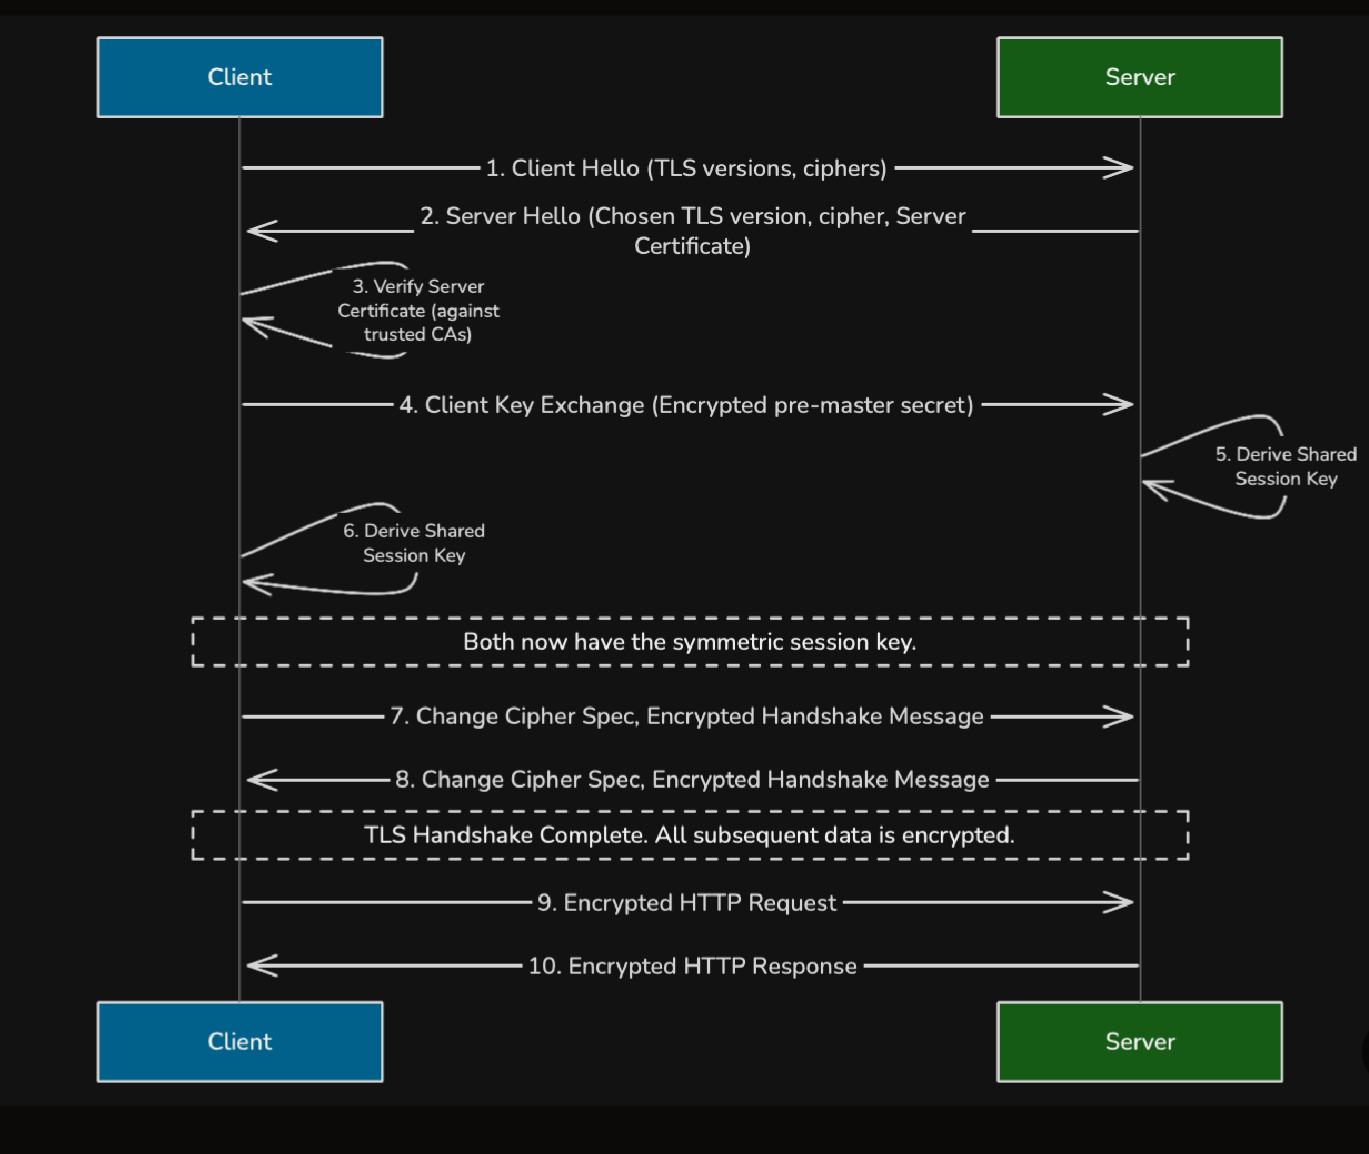

In [6]:
display(Image(filename='Utils/3.png'))

1. **Client Hello**: The client initiates the connection, sending a "Client Hello" message that includes its supported TLS versions, cipher suites, and a random number.

2. **Server Hello**: The server responds with a "Server Hello," selecting the best TLS version and cipher suite, along with its own random number and its SSL/TLS certificate.
(A cipher suite is like a recipe or set of ingredients that defines how encryption, authentication, and key exchange will happen in a TLS (HTTPS) connection.)

3. **Certificate Verification**: The client verifies the server's certificate by checking its validity, expiry date, and whether it's issued by a trusted Certificate Authority (CA). This step ensures the client is talking to the legitimate server.

4. **Key Exchange**: The client and server then use public-key cryptography (from the server's certificate) to securely exchange a pre-master secret. Both parties then independently derive a shared symmetric session key using this secret and the random numbers.

5. **Encrypted Communication**: Once the session key is established, all subsequent application data (HTTP requests and responses) is encrypted and decrypted using this much faster symmetric encryption key.

## How this key wala part work


Note : 

1. Running HTTPS locally requires an SSL certificate

2. If you want to test HTTPS on localhost, tools like:
    
    1. mkcert or OpenSSL can generate local SSL certificates.

    2. Frameworks like Vite, Next.js, or FastAPI can be configured to use them for secure testing.

3. **Local = HTTP (simple and fast) && Production = HTTPS (secure and mandatory)**

## 7. HTTP vs. HTTPS: Key Differences

| Feature           | HTTP                                          | HTTPS                                               |
|--------------------|-----------------------------------------------|-----------------------------------------------------|
| Security           | Unencrypted, data in plain text               | Encrypted via SSL/TLS                               |
| Port               | 80                                            | 443                                                 |
| Performance        | Slightly faster due to less overhead          | Slightly higher latency (improving with TLS 1.3)    |
| Authentication     | None                                          | Server authentication via digital certificates      |
| Data Integrity     | No guarantee, susceptible to tampering        | Guaranteed against tampering                        |
| SEO & Trust        | Lower ranking, browser warnings, "Not Secure" | Preferred by search engines, padlock icon, user trust |
| Use Case           | Local development, internal, non-sensitive apps | All production web traffic, APIs, sensitive data


## 8. Evolution of HTTP Protocols